#### load data 

In [1]:
import pandas as pd
import numpy as np
import gc

date = ['0430', '0501', '0502', '0503', '0504', '0505', '0506']

mr = pd.DataFrame()
for i in date:
    d = pd.read_csv('../input/knowyou_mr_2018'+i+'.csv', encoding='gbk',
                      usecols=['时间', 'CGI', 'MR下行弱覆盖比例', 'MR下行良好覆盖比例'])
    mr = pd.concat([mr, d])
mr = mr.rename(columns={'时间':'time', 'CGI':'cgi', 'MR下行弱覆盖比例':'mr_low', 'MR下行良好覆盖比例':'mr_high'})
mr = mr.replace('null', np.nan)
mr = mr.dropna(how='any')
mr.to_csv('../input/mr.csv', index=False)
del mr
gc.collect()

col_names = [
    'city', 'region', 'time', 'cgi', 
    'voice_connection', 'wifi_connection', 'video_connection', 
    'voice_disconnection', 'wifi_disconnection', 'video_disconnection',
    'esrvcc_convert', 'voice_convert_1', 'convert_rate', 'voice_convert_2',
    'voice_push_miss', 'voice_pull_miss', 'voice_pull_delay', 'voice_count', 'data_count',
    'rrc_connection', 'erab_connection', 'erab_trash', 
    'wifi_disconnection_1', 'prb_push', 'prb_pull', 'pdcch_cce', 'rrc_max', 
    'csgb_rrc', 'rrc_2g', 'rrc_3g', 'rrc_num'
    
#     'video_connection','wifi_disconnection', 'video_disconnection','voice_convert_2',
#     'voice_push_miss', 'voice_pull_miss', 'voice_count', 'data_count','rrc_connection',
#     'erab_trash','rrc_2g'
    
#     'voice_connection','wifi_connection', 'video_connection', 
#     'voice_disconnection', 'wifi_disconnection', 'video_disconnection',
#     'esrvcc_convert', 'voice_convert_1','voice_convert_2',
#     'voice_push_miss', 'voice_pull_miss', 'voice_pull_delay', 'voice_count', 'data_count',
#     'rrc_connection',  'erab_trash', 'rrc_2g'
]
pm = pd.DataFrame()
for i in date:
    d = pd.read_csv('../input/knowyou_pm_2018'+i+'.csv', encoding='gbk', names=col_names, skiprows=1)
    pm = pd.concat([pm, d])
pm = pm.replace('null', np.nan)
pm.to_csv('../input/pm.csv', index=False)
del pm
gc.collect()

49

In [1]:
import pandas as pd
mr = pd.read_csv('../input/knowyou_mr_20180430.csv', encoding='gbk')

In [2]:
mr.head()

,时间,省份,地市,区县,CGI,MR下行弱覆盖比例,MR下行良好覆盖比例,MR上行干扰比例,MR上行丢包率大于百份之一,MR上行丢包率大于百分之五,MR下行丢包率大于百份之一,MR下行丢包率大于百分之五,上行信噪比平均值
0,2018-04-30 06:00:00,云南省,昆明,呈贡县,460-00-567250-22,0.011754,0.663954,1.0,NaN,NaN,NaN,NaN,13.123601
1,2018-04-30 08:00:00,云南省,昆明,呈贡县,460-00-567250-22,0.006559,0.651946,1.0,0.0,0.0,0.0,0.0,12.738539
2,2018-04-30 00:00:00,云南省,昆明,呈贡县,460-00-567250-22,0.084109,0.646228,1.0,0.0,0.0,0.0,0.0,12.682461
3,2018-04-30 07:00:00,云南省,昆明,呈贡县,460-00-567250-22,0.008689,0.664253,1.0,NaN,NaN,NaN,NaN,12.261928
4,2018-04-30 02:00:00,云南省,昆明,呈贡县,460-00-567250-22,0.020190,0.784442,1.0,0.0,0.0,0.0,0.0,13.937202


In [3]:
mr.columns

Index(['时间', '省份', '地市', '区县', 'CGI', 'MR下行弱覆盖比例', 'MR下行良好覆盖比例', 'MR上行干扰比例',
       'MR上行丢包率大于百份之一', 'MR上行丢包率大于百分之五', 'MR下行丢包率大于百份之一', 'MR下行丢包率大于百分之五',
       '上行信噪比平均值'],
      dtype='object')

In [6]:
mr['区县'].unique()

array(['呈贡县', '嵩明县', '晋宁县', '西山区', '盘龙区', '寻甸县', '官渡区', '安宁市', '石林县',
       '五华区', '富民县', '宜良县', '禄劝县', '东川区'], dtype=object)

#### data init

In [49]:
import pandas as pd
pm = pd.read_csv('../input/pm.csv')
mr = pd.read_csv('../input/mr.csv')

In [51]:
pm.head()

,city,region,time,cgi,voice_connection,wifi_connection,video_connection,voice_disconnection,wifi_disconnection,video_disconnection,...,erab_trash,wifi_disconnection_1,prb_push,prb_pull,pdcch_cce,rrc_max,csgb_rrc,rrc_2g,rrc_3g,rrc_num
0,昆明,嵩明县,2018-04-30 05:00:00,460-00-627060-22,1.000000,1.000000,NaN,0.0,0.0000,NaN,...,0.0,0.000000,0.0116,0.0120,NaN,16.0,4.0,4.0,0.0,5.0
1,昆明,嵩明县,2018-04-30 03:00:00,460-00-627060-22,NaN,1.000000,NaN,NaN,0.0000,NaN,...,0.0,0.000000,0.0192,0.0151,NaN,21.0,0.0,0.0,0.0,6.0
2,昆明,嵩明县,2018-04-30 04:00:00,460-00-627060-22,0.999394,0.999394,NaN,0.0,0.0000,NaN,...,0.0,0.000000,0.0094,0.0098,NaN,15.0,1.0,1.0,0.0,5.0
3,昆明,嵩明县,2018-04-30 00:00:00,460-00-627060-22,1.000000,1.000000,NaN,0.0,0.0000,NaN,...,0.0,0.000000,0.0383,0.0472,NaN,32.0,1.0,1.0,0.0,10.0
4,昆明,嵩明县,2018-04-30 23:00:00,460-00-627060-22,1.000000,1.000000,NaN,0.0,0.0008,NaN,...,0.0,0.000337,0.1029,0.2335,NaN,39.0,6.0,6.0,0.0,13.0


In [52]:
pm.city.unique()

array(['昆明'], dtype=object)

In [53]:
len(pm.region.unique())

14

In [2]:
train = pd.merge(pm, mr, on=['time', 'cgi'], how='inner')

In [3]:
train.shape # (1208345, 33)

(8457665, 33)

In [4]:
train.mr_high.isnull().sum()

0

In [5]:
train.mr_low.isnull().sum()

0

In [6]:
train.time.isnull().sum()

0

In [7]:
train.cgi.isnull().sum()

0

In [8]:
train.to_csv('../input/train.csv', index=False)

In [9]:
train.region.unique()

array(['嵩明县', '呈贡县', '寻甸县', '宜良县', '官渡区', '盘龙区', '石林县', '富民县', '禄劝县',
       '安宁市', '西山区', '晋宁县', '五华区', '东川区'], dtype=object)

In [10]:
train.shape

(8457665, 33)

In [12]:
train = train[train['region']=='西山区']

In [13]:
train.to_csv('../input/train_sample.csv', index=False)

In [16]:
import gc
del train
gc.collect()

68

#### data processing

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('../input/train.csv')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn

In [3]:
train = train[train['mr_low']>0]

In [4]:
train.shape

(7953883, 33)

In [5]:
def format_(dataframe, feature, fillna='0.0', astype=np.float32, normalize=True):
    print('format', feature)
    dataframe[feature] = dataframe[feature].fillna(fillna)
    dataframe[feature] = dataframe[feature].astype(np.float32)
    if normalize:
        dataframe.loc[dataframe[feature]>1, feature] = 1
        dataframe.loc[dataframe[feature]<0, feature] = 0
    return dataframe

In [6]:
from sklearn.preprocessing import MinMaxScaler
def normalized_feature(dataframe, feature):
    print('start scale', feature)
    mms = MinMaxScaler()
    return mms.fit_transform(dataframe[feature].values.reshape(-1, 1))

In [7]:
# rate 1
posi_f = [
    'voice_connection', 'wifi_connection',
    'voice_convert_1', 'convert_rate',
    'rrc_connection', 'erab_connection',
    'esrvcc_convert'
]

# rate 0
navg_f = [
    'voice_disconnection', 'wifi_disconnection',
    'wifi_disconnection_1',
    'erab_trash', 'prb_pull', 'prb_push'
]

# count 
count_f = [
    'voice_pull_delay','voice_count', 'data_count', 
    'rrc_max', 'csgb_rrc', 'rrc_2g', 'rrc_3g', 'rrc_num',
    'voice_push_miss', 'voice_pull_miss'
]

# drop
drop_f = [
    'video_connection', 'video_disconnection', 'voice_convert_2', 'voice_convert_2', 'pdcch_cce'
]
    
for feature in posi_f:
    train = format_(train, feature, fillna=train[feature].mean())
    
for feature in navg_f:
    train = format_(train, feature, fillna=train[feature].mean())
    
for feature in count_f:
    train = format_(train, feature, fillna=train[feature].mean(), normalize=False)
    train[feature] = normalized_feature(train, feature)
    
train = train.drop(drop_f, axis=1)

format voice_connection
format wifi_connection
format voice_convert_1
format convert_rate
format rrc_connection
format erab_connection
format esrvcc_convert
format voice_disconnection
format wifi_disconnection
format wifi_disconnection_1
format erab_trash
format prb_pull
format prb_push
format voice_pull_delay
start scale voice_pull_delay
format voice_count
start scale voice_count
format data_count
start scale data_count
format rrc_max
start scale rrc_max
format csgb_rrc
start scale csgb_rrc
format rrc_2g
start scale rrc_2g
format rrc_3g
start scale rrc_3g
format rrc_num
start scale rrc_num
format voice_push_miss
start scale voice_push_miss
format voice_pull_miss
start scale voice_pull_miss


In [8]:
train.mr_low = train.mr_low.astype(np.float32)
train.mr_high = train.mr_high.astype(np.float32)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7953883 entries, 0 to 8457664
Data columns (total 29 columns):
city                    object
region                  object
time                    object
cgi                     object
voice_connection        float32
wifi_connection         float32
voice_disconnection     float32
wifi_disconnection      float32
esrvcc_convert          float32
voice_convert_1         float32
convert_rate            float32
voice_push_miss         float32
voice_pull_miss         float32
voice_pull_delay        float32
voice_count             float32
data_count              float32
rrc_connection          float32
erab_connection         float32
erab_trash              float32
wifi_disconnection_1    float32
prb_push                float32
prb_pull                float32
rrc_max                 float32
csgb_rrc                float32
rrc_2g                  float32
rrc_3g                  float32
rrc_num                 float32
mr_low                  flo

In [10]:
# train['MCC'] = train['cgi'].apply(lambda x: str(x).split('-')[0])
# train['MNC'] = train['cgi'].apply(lambda x: str(x).split('-')[1])
train['ENODEB_ID'] = train['cgi'].apply(lambda x: str(x).split('-')[2])
train['CID'] = train['cgi'].apply(lambda x: str(x).split('-')[3])
train['ENODEB_ID'] = train['ENODEB_ID'].astype(np.int32)
train['CID'] = train['CID'].astype(np.int32)

In [11]:
train['datetime'] = train['time'].apply(lambda x: str(x).split(' ')[0])

# train['month'] = pd.to_datetime(train['time']).dt.month
# train['day'] = pd.to_datetime(train['time']).dt.day
train['hour'] = pd.to_datetime(train['time']).dt.hour

In [12]:
from sklearn.preprocessing import LabelEncoder
train['region'] = LabelEncoder().fit_transform(train['region'])

In [13]:
# train['type'] = LabelEncoder().fit_transform(train['type'])

In [14]:
train = train.drop(['city', 'cgi', 'time'], axis=1)

In [15]:
train.head()

,region,voice_connection,wifi_connection,voice_disconnection,wifi_disconnection,esrvcc_convert,voice_convert_1,convert_rate,voice_push_miss,voice_pull_miss,...,csgb_rrc,rrc_2g,rrc_3g,rrc_num,mr_low,mr_high,ENODEB_ID,CID,datetime,hour
0,8,1.000000,1.000000,0.0000,0.0000,0.99387,1.000000,0.983221,0.001675,0.000367,...,0.001865,0.000477,0.0,0.005030,0.004261,0.257132,627060,22,2018-04-30,5
1,8,0.998395,1.000000,0.0002,0.0000,0.99387,0.995091,0.991150,0.000812,0.000923,...,0.000000,0.000000,0.0,0.006036,0.002041,0.312765,627060,22,2018-04-30,3
2,8,0.999394,0.999394,0.0000,0.0000,0.99387,1.000000,1.000000,0.000000,0.002423,...,0.000466,0.000119,0.0,0.005030,0.002248,0.353771,627060,22,2018-04-30,4
3,8,1.000000,1.000000,0.0000,0.0000,0.99387,1.000000,0.990268,0.000000,0.000000,...,0.000466,0.000119,0.0,0.010060,0.001056,0.382209,627060,22,2018-04-30,0
4,8,1.000000,1.000000,0.0000,0.0008,0.99387,1.000000,0.995587,0.001152,0.000000,...,0.002797,0.000715,0.0,0.013078,0.006753,0.351172,627060,22,2018-04-30,23


In [16]:
num_f = posi_f + navg_f + count_f

In [17]:
cat_f = [
    'region', 'ENODEB_ID', 'CID', 'hour'
]

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7953883 entries, 0 to 8457664
Data columns (total 30 columns):
region                  int64
voice_connection        float32
wifi_connection         float32
voice_disconnection     float32
wifi_disconnection      float32
esrvcc_convert          float32
voice_convert_1         float32
convert_rate            float32
voice_push_miss         float32
voice_pull_miss         float32
voice_pull_delay        float32
voice_count             float32
data_count              float32
rrc_connection          float32
erab_connection         float32
erab_trash              float32
wifi_disconnection_1    float32
prb_push                float32
prb_pull                float32
rrc_max                 float32
csgb_rrc                float32
rrc_2g                  float32
rrc_3g                  float32
rrc_num                 float32
mr_low                  float32
mr_high                 float32
ENODEB_ID               int32
CID                     int

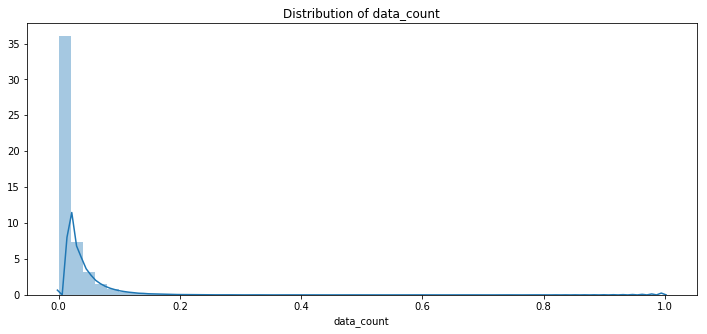

In [34]:
plt.figure(figsize=(12,5))
plt.title("Distribution of data_count")
ax = sns.distplot(train_x["data_count"])

In [20]:
train.datetime.unique()

array(['2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
       '2018-05-04', '2018-05-05', '2018-05-06'], dtype=object)

#### datetime window 

In [21]:
test_set = train[train.loc[:,('datetime')]=='2018-05-06']

In [22]:
train_set = train[train.loc[:,('datetime')]=='2018-05-05']
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-04']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-03']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-02']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-05-01']])
train_set = pd.concat([train_set, train[train.loc[:,('datetime')]=='2018-04-30']])

In [23]:
test_set = test_set.drop(['datetime'], axis=1)
train_set = train_set.drop(['datetime'], axis=1)

In [24]:
train_set.shape

(6808938, 29)

In [25]:
test_set.shape

(1144945, 29)

#### split data for mr_low

In [26]:
import lightgbm as lgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import gc

In [27]:
test_y_low = test_set['mr_low']
test_y_high = test_set['mr_high']
test_x = test_set.drop(['mr_low', 'mr_high'], axis=1)

In [28]:
train_y_low = train_set['mr_low']
train_y_high = train_set['mr_high']
train_x = train_set.drop(['mr_low', 'mr_high'], axis=1)

In [29]:
trainx, validx, trainy, validy = train_test_split(
    train_x, 
    train_y_low, 
    test_size=0.1, 
    random_state=432423
)

In [30]:
trainx.shape

(6128044, 27)

In [31]:
test_x.shape

(1144945, 27)

In [32]:
validx.shape

(680894, 27)

In [33]:
import gc
del train
del train_set
del test_set
gc.collect()

2397

#### nn model

In [32]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# from keras.layers import LSTM

# training_set_x=train_x.values
# training_set_y=train_y_low.values
# dataset_x = training_set_x.astype('float32')
# dataset_y = training_set_y.astype('float32')

# scaler_x = MinMaxScaler(feature_range=(0, 1))
# x = scaler_x.fit_transform(dataset_x)

# scaler_y = MinMaxScaler(feature_range=(0, 1))
# y = scaler_y.fit_transform(dataset_y.reshape(-1,1))

# model = Sequential ()
# # model.add (LSTM (1000 , activation = 'tanh', inner_activation = 'hard_sigmoid' , input_shape =(x.shape[1], 1) ))
# # model.add(Dropout(0.2))
# model.add(Dense(32, input_shape=(x.shape[1],)))
# model.add(Dropout(0.4))
# model.add(Dense(64,activation='tanh'))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation = 'linear'))
# print(model.summary())
# model.compile(loss ="mean_squared_error" ,optimizer = "sgd")   
# model.fit(x, y, batch_size =16, nb_epoch =25, validation_split=0.3, shuffle = False)
# model.save('nn/nn.h5')   

In [33]:
# from keras.models import Model, load_model  

# training_set_x = test_x.values

# dataset_x = training_set_x.astype('float32')

# scaler_x = MinMaxScaler(feature_range =(0, 1))
# x = scaler_x.fit_transform(dataset_x)    

# model = load_model("nn/nn.h5")
# model.compile(
#     loss='categorical_crossentropy',
#     optimizer='rmsprop',
#     metrics=['accuracy']
# )
# pred=model.predict(x.reshape(-1,26))

#### gbm model

In [34]:
train_data = lgb.Dataset(trainx, trainy, categorical_feature=cat_f)
valid_data = lgb.Dataset(validx, validy, categorical_feature=cat_f)

params = {
#     'application': 'binary',
    'boosting': 'gbdt',
    'num_leaves': 80,
    'min_data_in_leaf': 50,
    'learning_rate': 0.05,
    'zero_as_missing': True,
    'lambda_l1': 0,
    'lambda_l2': 0,
    'metric':{'mse'}
}

model = lgb.train(
    params, train_data, 10000,
    valid_sets=[train_data, valid_data],
    valid_names=['train', 'valid'],
    verbose_eval=50,
    early_stopping_rounds=100
)

/home/ihave4cat/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:1036: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
/home/ihave4cat/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:681: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[50]	train's l2: 0.00358016	valid's l2: 0.0036287
[100]	train's l2: 0.0029655	valid's l2: 0.00306379
[150]	train's l2: 0.002662	valid's l2: 0.00279206
[200]	train's l2: 0.0024939	valid's l2: 0.00265135
[250]	train's l2: 0.00238151	valid's l2: 0.00256343
[300]	train's l2: 0.00229872	valid's l2: 0.00250339
[350]	train's l2: 0.00223018	valid's l2: 0.00245612
[400]	train's l2: 0.00217697	valid's l2: 0.00241897
[450]	train's l2: 0.00212779	valid's l2: 0.00238466
[500]	train's l2: 0.00208347	valid's l2: 0.00235673
[550]	train's l2: 0.00204604	valid's l2: 0.00233199
[600]	train's l2: 0.00201433	valid's l2: 0.00231304
[650]	train's l2: 0.0019858	valid's l2: 0.00229693
[700]	train's l2: 0.00195957	valid's l2: 0.00228233
[750]	train's l2: 0.00193341	valid's l2: 0.00226861
[800]	train's l2: 0.00190938	valid's l2: 0.00225624
[850]	train's l2: 0.00188703	valid's l2: 0.00224567
[900]	train's l2: 0.00186699	valid's l2: 0.00223589
[950]	tr

In [35]:
pre = model.predict(test_x)

#### metrics

In [36]:
from sklearn import metrics
valid_auc = metrics.mean_squared_error(test_y_low, pre)
print(valid_auc)
# 0.010316418224302482
# 0.01018804997676322
# 0.01009214997291217

# 0.0023843103652884967

0.002229869177167281


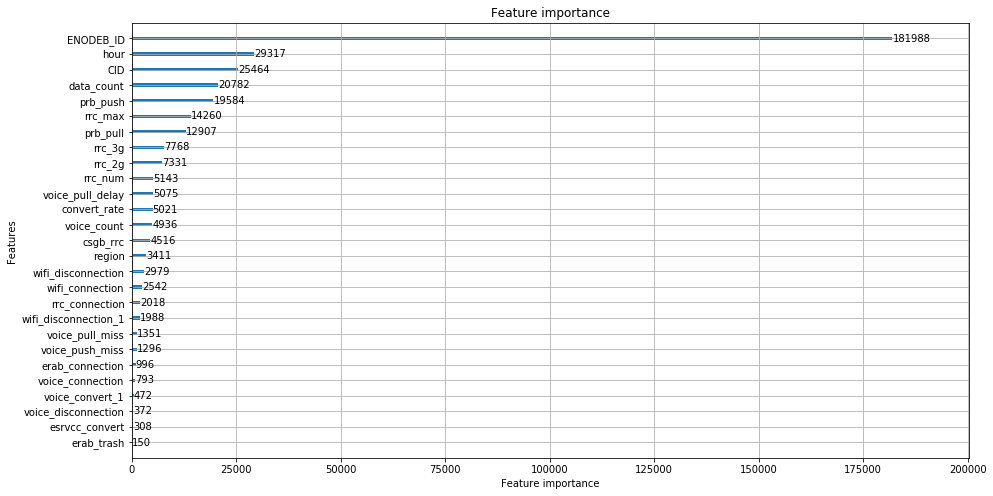

In [44]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小
lgb.plot_importance(booster=model)

In [38]:
test_y_low.shape

(1144945,)

In [39]:
def draw(real, pre, skip=0, n=10):
    al = []
    for i in range(n):
        al.append(i)

    ax1 = plt.subplot(221)
    ax1.set_title('pre')   
    ax1.plot(al, pre[skip:skip+n], 'r', label='pre')
    ax1.legend(bbox_to_anchor=[1, 1])  
    ax1.grid() 

    ax2 = plt.subplot(222)
    ax2.set_title('real')   
    ax2.plot(al, real[skip:skip+n].tolist(), 'b', label='real')
    ax2.legend(bbox_to_anchor=[1, 1])  
    ax2.grid() 

    ax3 = plt.subplot(212)
    ax3.set_title('pre & real')   
    ax3.plot(al, pre[skip:skip+n], 'r', label='pre')
    ax3.plot(al, real[skip:skip+n].tolist(), 'b', label='real')
    ax3.legend(bbox_to_anchor=[1, 1])  
    ax3.grid() 

    plt.show()

In [40]:
len(pre)

1144945

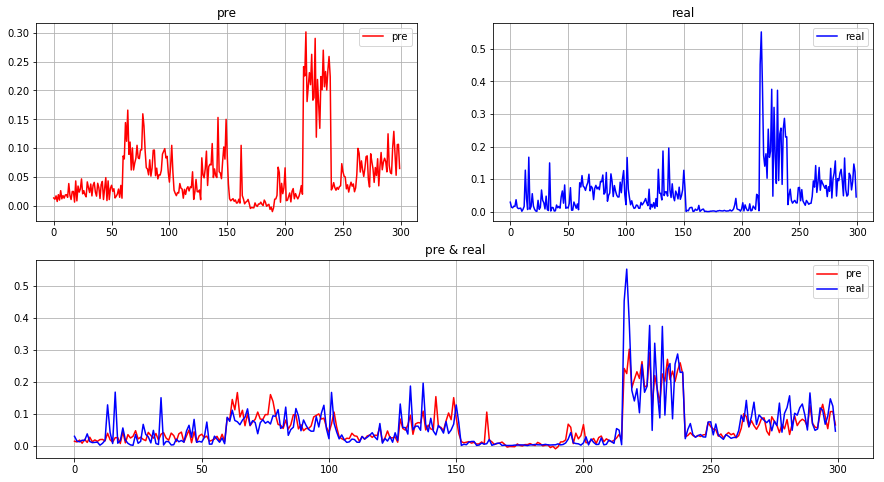

In [45]:
draw(test_y_low, pre, skip=226, n=300)

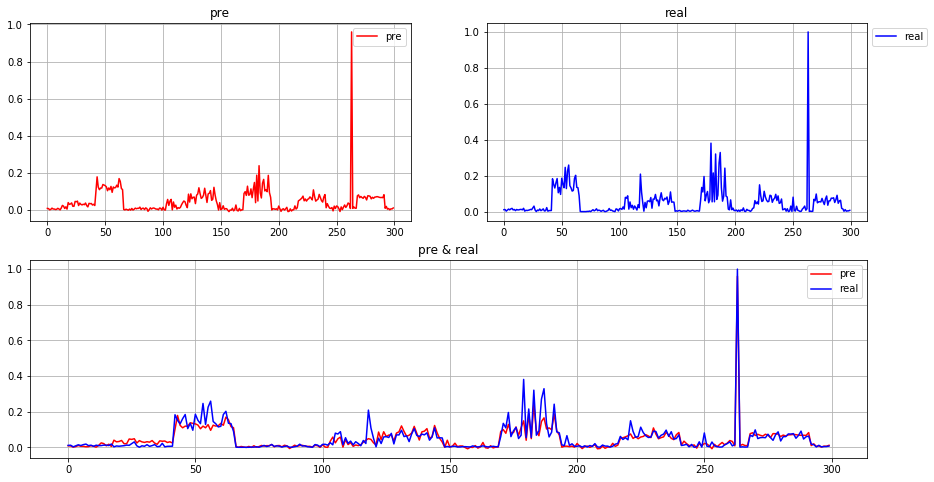

In [46]:
draw(test_y_low, pre, skip=40000, n=300)

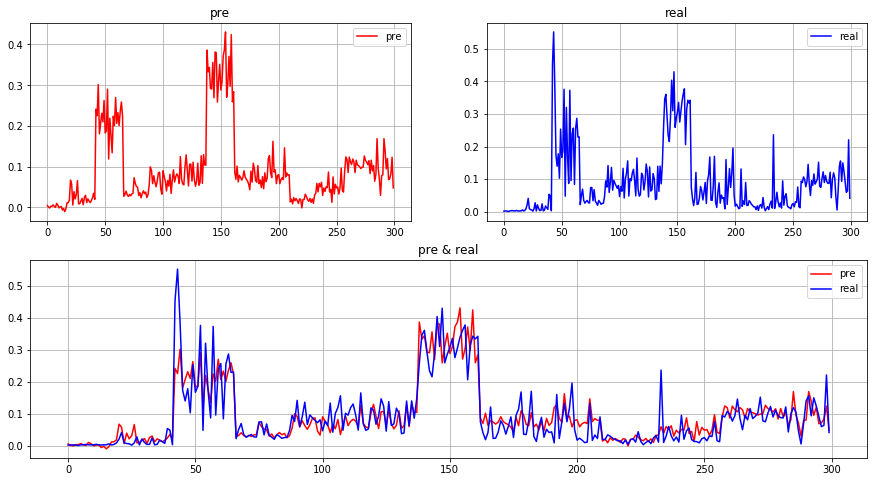

In [47]:
draw(test_y_low, pre, skip=400, n=300)

In [39]:
pm = pd.read_csv('../input/knowyou_pm_20180501.csv', encoding='gbk')

In [40]:
pm.columns

Index(['地市', '区县', '时间', 'CGI', 'VOLTE语音接通率', '无线接通率', 'VOLTE视频接通率',
       'VOLTE语音掉话率', '无线掉线率', 'VOLTE视频掉话率', 'ESRVCC切换成功率',
       'VOLTE语音用户QCI等于1切换成功率', '切换成功率', 'VOLTE视频用户QCI等于2切换成功率', 'VOLTE语音上行丢包率',
       'VOLTE语音下行丢包率', 'VOLTE下行时延MS', 'VOLTE语音话务量ERL', '数据业务量GB', 'RRC连接建立成功率',
       'ERAB建立成功率', 'ERAB拥塞率', '无线掉线率.1', '上行PRB平均利用率', '下行PRB平均利用率',
       'PDCCH信道CCE占用率', 'RRC连接最大数', 'CSFB触发的RRC连接释放次数', '重定向到2G的RRC连接释放次数',
       '重定向到3G的RRC连接释放次数', '有效RRC连接最大数'],
      dtype='object')

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('../input/train.csv')

In [2]:
train.columns

Index(['city', 'region', 'time', 'cgi', 'voice_connection', 'wifi_connection',
       'video_connection', 'voice_disconnection', 'wifi_disconnection',
       'video_disconnection', 'esrvcc_convert', 'voice_convert_1',
       'convert_rate', 'voice_convert_2', 'voice_push_miss', 'voice_pull_miss',
       'voice_pull_delay', 'voice_count', 'data_count', 'rrc_connection',
       'erab_connection', 'erab_trash', 'wifi_disconnection_1', 'prb_push',
       'prb_pull', 'pdcch_cce', 'rrc_max', 'csgb_rrc', 'rrc_2g', 'rrc_3g',
       'rrc_num', 'mr_low', 'mr_high'],
      dtype='object')

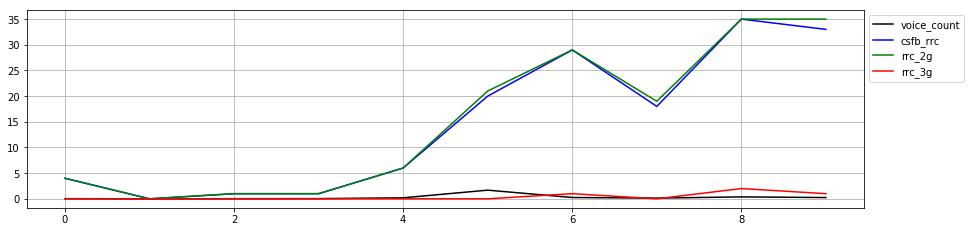

In [69]:
n = 10
al = []
for i in range(n):
    al.append(i)
target = train[['voice_count', 'csgb_rrc', 'rrc_2g', 'rrc_3g']]

ax3 = plt.subplot(211)
ax3.plot(al, target['voice_count'][:n].values, 'black', label='voice_count')
ax3.plot(al, target['csgb_rrc'][:n].values, 'blue', label='csfb_rrc')
ax3.plot(al, target['rrc_2g'][:n].values, 'green', label='rrc_2g')
ax3.plot(al, target['rrc_3g'][:n].values, 'red', label='rrc_3g')


ax3.legend(bbox_to_anchor=[1, 1])  
ax3.grid() 

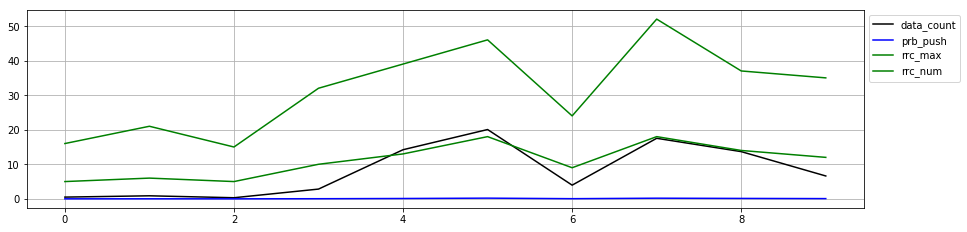

In [70]:
n = 10
al = []
for i in range(n):
    al.append(i)
target = train[['data_count', 'prb_push', 'rrc_max', 'rrc_num']]

ax3 = plt.subplot(211)
ax3.plot(al, target['data_count'][:n].values/10000, 'black', label='data_count')
ax3.plot(al, target['prb_push'][:n].values, 'blue', label='prb_push')
ax3.plot(al, target['rrc_max'][:n].values, 'green', label='rrc_max')
ax3.plot(al, target['rrc_num'][:n].values, 'green', label='rrc_num')


ax3.legend(bbox_to_anchor=[1, 1])  
ax3.grid() 

In [49]:
target.isnull().sum()

data_count     1325
prb_push      18590
rrc_max        1327
rrc_num        1498
dtype: int64

In [36]:
train.shape

(8457665, 33)

In [10]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

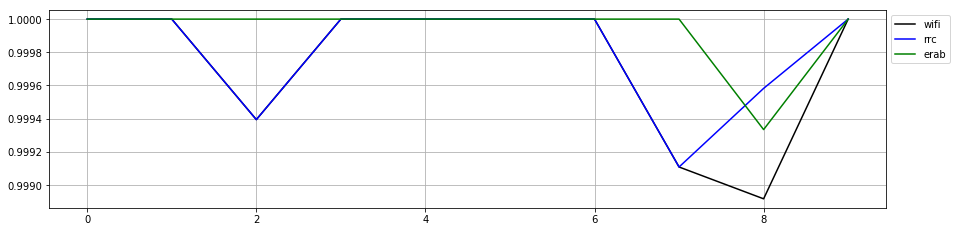

In [71]:
n = 10
al = []
for i in range(n):
    al.append(i)
target = train[['erab_connection', 'rrc_connection', 'wifi_connection']]

ax3 = plt.subplot(211)
ax3.plot(al, target['wifi_connection'][:n].values, 'black', label='wifi')
ax3.plot(al, target['rrc_connection'][:n].values, 'blue', label='rrc')
ax3.plot(al, target['erab_connection'][:n].values, 'green', label='erab')
ax3.legend(bbox_to_anchor=[1, 1])  
ax3.grid() 

In [32]:
target.isnull().sum()

erab_connection    26964
rrc_connection     19657
wifi_connection    27137
dtype: int64

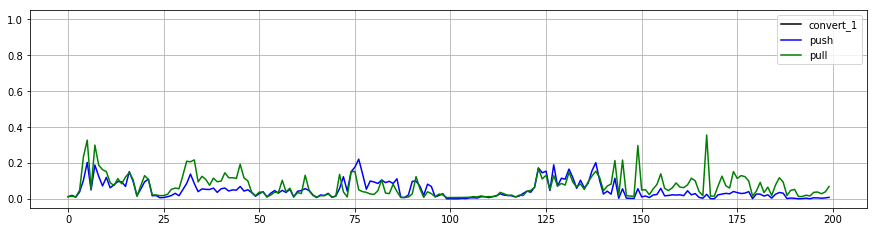

In [43]:
n = 200
al = []
for i in range(n):
    al.append(i)
target = train[['voice_convert_2', 'prb_push', 'prb_pull']]

ax3 = plt.subplot(211)
ax3.plot(al, target['voice_convert_2'][:n].values, 'black', label='convert_1')
ax3.plot(al, target['prb_push'][:n].values, 'b', label='push')
ax3.plot(al, target['prb_pull'][:n].values, 'g', label='pull')
ax3.legend(bbox_to_anchor=[1, 1])  
ax3.grid() 

In [44]:
target.isnull().sum()

voice_convert_2    8442716
prb_push             18590
prb_pull             18590
dtype: int64

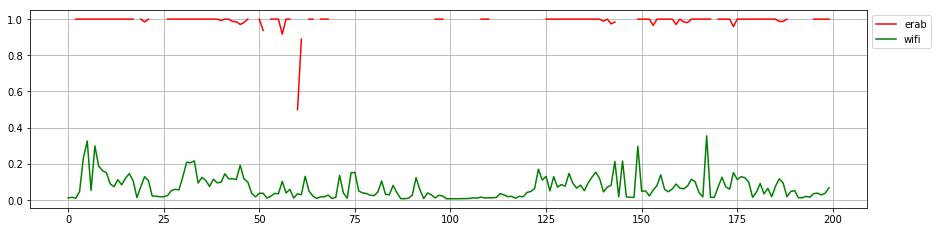

In [45]:
n = 200
al = []
for i in range(n):
    al.append(i)
target = train[['voice_convert_1', 'prb_pull']]

ax3 = plt.subplot(211)
ax3.plot(al, target['voice_convert_1'][:n].values, 'r', label='erab')
ax3.plot(al, target['prb_pull'][:n].values, 'g', label='wifi')
ax3.legend(bbox_to_anchor=[1, 1])  
ax3.grid() 

In [46]:
target.isnull().sum()

voice_convert_1    2067735
prb_pull             18590
dtype: int64

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('../input/train.csv')

In [2]:
train.columns

Index(['city', 'region', 'time', 'cgi', 'voice_connection', 'wifi_connection',
       'video_connection', 'voice_disconnection', 'wifi_disconnection',
       'video_disconnection', 'esrvcc_convert', 'voice_convert_1',
       'convert_rate', 'voice_convert_2', 'voice_push_miss', 'voice_pull_miss',
       'voice_pull_delay', 'voice_count', 'data_count', 'rrc_connection',
       'erab_connection', 'erab_trash', 'wifi_disconnection_1', 'prb_push',
       'prb_pull', 'pdcch_cce', 'rrc_max', 'csgb_rrc', 'rrc_2g', 'rrc_3g',
       'rrc_num', 'mr_low', 'mr_high'],
      dtype='object')

In [ ]:
Index(['地市', '区县', '时间', 'CGI', 'VOLTE语音接通率', '无线接通率', 'VOLTE视频接通率',
       'VOLTE语音掉话率', '无线掉线率', 'VOLTE视频掉话率', 'ESRVCC切换成功率',
       'VOLTE语音用户QCI等于1切换成功率', '切换成功率', 'VOLTE视频用户QCI等于2切换成功率', 'VOLTE语音上行丢包率',
       'VOLTE语音下行丢包率', 'VOLTE下行时延MS', 'VOLTE语音话务量ERL', '数据业务量GB', 'RRC连接建立成功率',
       'ERAB建立成功率', 'ERAB拥塞率', '无线掉线率.1', '上行PRB平均利用率', '下行PRB平均利用率',
       'PDCCH信道CCE占用率', 'RRC连接最大数', 'CSFB触发的RRC连接释放次数', '重定向到2G的RRC连接释放次数',
       '重定向到3G的RRC连接释放次数', '有效RRC连接最大数'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

In [26]:
n = 100
al = []
for i in range(n):
    al.append(i)
features = ['data_count', 'prb_push', 'rrc_num', 'rrc_max', 'erab_trash']
target = train[features]

In [27]:
from sklearn.preprocessing import MinMaxScaler
def normalized_feature(dataframe, feature):
    print('start scale', feature)
    mms = MinMaxScaler()
    return mms.fit_transform(dataframe[feature].values.reshape(-1, 1))

In [28]:
target = target.fillna(0)
for feature in features:
    target[feature]  = normalized_feature(target, feature)

start scale data_count
start scale prb_push
start scale rrc_num
start scale rrc_max
start scale erab_trash


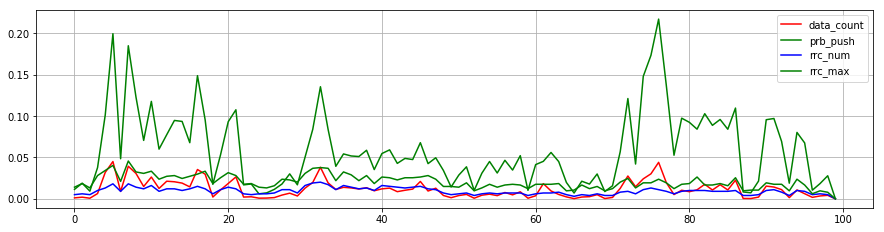

In [32]:
ax3 = plt.subplot(211)
ax3.plot(al, target['data_count'][:n].values, 'r',label='data_count')
ax3.plot(al, target['prb_push'][:n].values, 'g', label='prb_push')
ax3.plot(al, target['rrc_num'][:n].values, 'b', label='rrc_num')
ax3.plot(al, target['rrc_max'][:n].values, 'g', label='rrc_max')
# ax3.plot(al, target['erab_trash'][:n].values, 'g', label='erab_trash')
ax3.legend(bbox_to_anchor=[1, 1])
ax3.grid()